# Результаты экспериментов
**Dataset_4**
1. Базовая модель

```
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', input_shape = (9,)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(2)])
```

***3-я итерация.*** loss: 0.0038 - accuracy: 0.7128 - val_loss: 0.0055 - val_accuracy: 0.7273

Параметры для модели:
1. split_percent = 0.9
2. BATCH_SIZE = 12
3. EPOCHS = 30
4. NN_optimizer = 'adam'
5. NN_loss = 'mse'

**4-я итерация.** loss: 0.0552 - accuracy: 0.6667 - val_loss: 0.0516 - val_accuracy: 0.6818
1. split_percent = 0.9
2. BATCH_SIZE = 12
3. EPOCHS = 45
4. NN_optimizer = 'SGD'
5. NN_loss = 'MeanAbsoluteError'

**5-я итерация.**  loss: 0.0057 - accuracy: 0.6462 - val_loss: 0.0044 - val_accuracy: 0.6818
1. split_percent = 0.9
2. BATCH_SIZE = 12
3. EPOCHS = 45
4. NN_optimizer = 'SGD'
5. NN_loss = 'mse'

**6-я итерация.**  loss: 0.0566 - accuracy: 0.4923 - val_loss: 0.0592 - val_accuracy: 0.6818
1. split_percent = 0.9
2. BATCH_SIZE = 12
3. EPOCHS = 30
4. NN_optimizer = 'adam'
5. NN_loss = 'MeanAbsoluteError'

***7-я итерация.*** loss: 0.0033 - accuracy: 0.7128 - val_loss: 0.0058 - val_accuracy: 0.7273

Параметры для модели:
1. split_percent = 0.9
2. BATCH_SIZE = 10
3. EPOCHS = 33
4. NN_optimizer = 'adam'
5. NN_loss = 'mse'


2. Базовая модель

```
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu', input_shape = (9,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2)])
```

**8-я итерация.** loss: 0.0072 - accuracy: 0.5692 - val_loss: 0.0045 - val_accuracy: 0.8182

Параметры для модели:
1. split_percent = 0.9
2. BATCH_SIZE = 10
3. EPOCHS = 32
4. NN_optimizer = 'adam'
5. NN_loss = 'mse'


**Dataset_5**

**9-я итерация.** loss: 0.0032 - accuracy: 0.6667 - val_loss: 0.0019 - val_accuracy: 0.7273

Параметры для модели:
1. split_percent = 0.9
2. BATCH_SIZE = 10
3. EPOCHS = 65
4. NN_optimizer = 'adamax'
5. NN_loss = 'mse'

Подключим Гугл.Диск для сохранения и загрузки моделей

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
! pip install pyyaml h5py  # Требуется для сохранения и загрузки моделей в HDF5-формате

Mounted at /content/drive


Настройки

In [ ]:
number_of_interations = 9 #Номер итерации для сохранения и загрузки готовой модели
split_percent = 0.9 # Процент данных для обучения

BATCH_SIZE = 10 # Размер пакета для обучения
EPOCHS = 65 # Количество эпох обучения
NN_optimizer = 'adamax' # Оптимизатор для модели НС
NN_loss = 'mse' # Функция потерь
csv_file = 'https://raw.githubusercontent.com/AnLiMan/Electronics_Differential_System/main/Datasets/Dataset_5.csv'  # Ссылка на датасет
save_path = "/content/drive/My Drive/Files for colab/NN for diss/NN_model_" + str(number_of_interations) + ".h5" # Путь для сохранения и загрузки моделей нейронки с гугл диска
print('Текущий номер для сохранения модели, чекпоинтов, а также загрузки существующей модели с облака: ', number_of_interations)

Текущий номер для сохранения модели, чекпоинтов, а также загрузки существующей модели с облака:  9


# Библиотеки

In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from keras import layers
from tensorflow import keras
import math
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import time

# Подготовка данных

## Загрузим датасет, выведем некоторую информацию и совершим серию проверок

In [ ]:
df = pd.read_csv(csv_file) # Прочтём датасет
df.head() # Выведем заголовок

,AngleServo,V,ax,ay,az,gx,gy,gz,temp,Deviation,V1,V2
0,0.8519,0.7725,0.1240,-0.0515,0.4374,-0.0157,-0.0157,-0.0157,0.9407,0.0,0.788,0.788
1,0.8519,0.7647,0.0398,-0.0079,-0.0079,-0.0079,-0.0079,0.0000,0.9397,0.0,0.780,0.780
2,0.8519,0.7529,0.0129,-0.0314,-0.0314,-0.0314,-0.0314,0.0000,0.9477,0.0,0.768,0.768
3,0.8519,0.7373,-0.0028,-0.0480,0.5966,-0.0178,0.0002,-0.0007,0.9397,0.0,0.752,0.752
4,0.8519,0.7843,-0.0338,-0.0073,0.0113,0.0000,0.0000,-0.0079,0.9661,0.0,0.800,0.800


In [ ]:
df.dtypes # Используемые типы данных

AngleServo    float64
V             float64
ax            float64
ay            float64
az            float64
gx            float64
gy            float64
gz            float64
temp          float64
Deviation     float64
V1            float64
V2            float64
dtype: object

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AngleServo  217 non-null    float64
 1   V           217 non-null    float64
 2   ax          217 non-null    float64
 3   ay          217 non-null    float64
 4   az          217 non-null    float64
 5   gx          217 non-null    float64
 6   gy          217 non-null    float64
 7   gz          217 non-null    float64
 8   temp        217 non-null    float64
 9   Deviation   217 non-null    float64
 10  V1          217 non-null    float64
 11  V2          217 non-null    float64
dtypes: float64(12)
memory usage: 20.5 KB
None


In [ ]:
print(df.shape)

(217, 12)


Проверим наличие отсутствующих значений.

In [ ]:
print(df.isna().sum())

AngleServo    0
V             0
ax            0
ay            0
az            0
gx            0
gy            0
gz            0
temp          0
Deviation     0
V1            0
V2            0
dtype: int64


Проверим на дубликаты

In [ ]:
print(df.duplicated(keep = False).value_counts())
print(df[df.duplicated(keep = False)])

False    217
dtype: int64
Empty DataFrame
Columns: [AngleServo, V, ax, ay, az, gx, gy, gz, temp, Deviation, V1, V2]
Index: []


Выкинем дубликаты

In [ ]:
df = df.drop_duplicates(keep = 'first').copy()
print(df.shape)

(217, 12)


Сбросим индекс dataframe

In [ ]:
df = df.reset_index(drop = True)

Выделим колонки из датасета, которые нужно будет предсказывать в будущем (Y).

In [ ]:
target_names = ['V1', 'V2']
y = df[target_names]
y.head()

,V1,V2
0,0.788,0.788
1,0.780,0.780
2,0.768,0.768
3,0.752,0.752
4,0.800,0.800


Выделим все независимые переменные из датасета, значений типа "строка" здесь быть не должно.

In [ ]:
feature_names = ['AngleServo', 'V', 'ax', 'ay', 'az', 'gx', 'gy', 'gz', 'temp','Deviation']
X = df[feature_names]
X.head()

,AngleServo,V,ax,ay,az,gx,gy,gz,temp,Deviation
0,0.8519,0.7725,0.1240,-0.0515,0.4374,-0.0157,-0.0157,-0.0157,0.9407,0.0
1,0.8519,0.7647,0.0398,-0.0079,-0.0079,-0.0079,-0.0079,0.0000,0.9397,0.0
2,0.8519,0.7529,0.0129,-0.0314,-0.0314,-0.0314,-0.0314,0.0000,0.9477,0.0
3,0.8519,0.7373,-0.0028,-0.0480,0.5966,-0.0178,0.0002,-0.0007,0.9397,0.0
4,0.8519,0.7843,-0.0338,-0.0073,0.0113,0.0000,0.0000,-0.0079,0.9661,0.0


Проверим размерности

In [ ]:
print(f"Рамерность Х, строки(общее количество значений), колонны (количество независимых переменных) = {X.shape}")
print(f"Рамерность Y, строки(общее количество значений), колонны (количество зависимых переменных) = {y.shape} ")

Рамерность Х, строки(общее количество значений), колонны (количество независимых переменных) = (217, 10)
Рамерность Y, строки(общее количество значений), колонны (количество зависимых переменных) = (217, 2) 


In [ ]:
print("Значения Х ")
print(X)

Значения Х 
     AngleServo       V      ax      ay      az      gx      gy      gz  \
0        0.8519  0.7725  0.1240 -0.0515  0.4374 -0.0157 -0.0157 -0.0157   
1        0.8519  0.7647  0.0398 -0.0079 -0.0079 -0.0079 -0.0079  0.0000   
2        0.8519  0.7529  0.0129 -0.0314 -0.0314 -0.0314 -0.0314  0.0000   
3        0.8519  0.7373 -0.0028 -0.0480  0.5966 -0.0178  0.0002 -0.0007   
4        0.8519  0.7843 -0.0338 -0.0073  0.0113  0.0000  0.0000 -0.0079   
..          ...     ...     ...     ...     ...     ...     ...     ...   
212      1.0000  0.9529 -0.0297 -0.0028  0.6945  0.0000  0.0000  0.0000   
213      1.0000  0.7902 -0.0087 -0.0021  0.5551  0.0000  0.0000  0.0000   
214      1.0000  0.7686  0.9137  0.5000  0.0000  0.0078  0.0000  0.0000   
215      1.0000  0.8020 -0.0275  0.5508 -0.0806  0.0019  0.0000  0.0000   
216      1.0000  0.8804 -0.0288 -0.0305  0.5544 -0.0157 -0.0157 -0.0157   

       temp  Deviation  
0    0.9407      0.000  
1    0.9397      0.000  
2    0.9477 

In [ ]:
print("Значения Y")
print(y)

Значения Y
        V1     V2
0    0.788  0.788
1    0.780  0.780
2    0.768  0.768
3    0.752  0.752
4    0.800  0.800
..     ...    ...
212  1.000  0.944
213  0.752  0.860
214  0.748  0.820
215  0.836  0.800
216  0.920  0.876

[217 rows x 2 columns]


Далее данные следует нормализовать, но т.к. это было сделано ранее, то этот этап можно пропустить и приступить к разделению данных на тренировочную и тестовые выборки

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 1 - split_percent)

In [ ]:
print("Тренировочные данные")
print(X_train)

Тренировочные данные
     AngleServo       V      ax      ay      az      gx      gy      gz  \
129      0.9074  0.8667  0.0669 -0.0541  0.4794 -0.0079 -0.0079 -0.0079   
215      1.0000  0.8020 -0.0275  0.5508 -0.0806  0.0019  0.0000  0.0000   
72       0.7593  0.7216  0.0507 -0.0573  0.5937  0.0000  0.0000  0.0000   
77       0.7593  0.7510  0.0485  0.9062 -0.0157 -0.0157 -0.0157 -0.0157   
47       0.7963  0.7255  0.0352  0.0266  0.5605 -0.0270 -0.0048  0.0275   
..          ...     ...     ...     ...     ...     ...     ...     ...   
97       0.8704  0.7255  0.0299 -0.0149  0.5802  0.0000  0.0000  0.0000   
134      0.9074  0.8235  0.0236 -0.0099  0.5313  0.0000  0.0000  0.0000   
107      0.8889  0.7059  0.0497 -0.0288  0.5820 -0.0059  0.0009 -0.0138   
175      0.9630  0.7922  0.0986 -0.1650  0.5390  0.0000  0.0000  0.0000   
35       0.8148  0.7255 -0.0272 -0.0236  0.5610 -0.0233 -0.0097  0.0061   

       temp  Deviation  
129  0.8427      0.000  
215  0.8238     -0.075  
72 

In [ ]:
print("Выходные данные для тренировочных")
print(y_train)

Выходные данные для тренировочных
        V1     V2
129  0.880  0.888
215  0.836  0.800
72   0.752  0.720
77   0.780  0.752
47   0.760  0.720
..     ...    ...
97   0.720  0.760
134  0.880  0.800
107  0.720  0.720
175  0.780  0.836
35   0.760  0.720

[195 rows x 2 columns]


In [ ]:
print("Данные для валидации (проверки)")
print(X_valid)

Данные для валидации (проверки)
     AngleServo       V      ax      ay      az      gx      gy      gz  \
212      1.0000  0.9529 -0.0297 -0.0028  0.6945  0.0000  0.0000  0.0000   
161      0.9444  0.7961  0.0378 -0.0400  0.6608 -0.0152  0.0148 -0.0260   
36       0.8148  0.7333  0.0426 -0.0537  0.5074 -0.0079 -0.0079 -0.0079   
28       0.8333  0.8922  0.0776 -0.0009  0.6614 -0.0260  0.0000  0.0000   
99       0.8704  0.7647  0.0311 -0.0555  0.5781  0.0000  0.0000  0.0000   
186      0.9630  0.8294 -0.0364 -0.0070  0.3818  0.0000  0.0000  0.0000   
86       0.7407  0.7353  0.1034 -0.0336  0.4639  0.0000  0.0000  0.0000   
51       0.7963  0.7549  0.5416 -0.0557 -0.0070  0.0229  0.0000  0.0000   
193      0.9815  0.7549  0.0533 -0.0304  0.3071  0.0000  0.0000  0.0000   
138      0.9259  0.7059  0.0427 -0.0249  0.5414  0.0000  0.0000  0.0000   
54       0.7963  0.7569  0.0067 -0.0350  0.5577 -0.0060  0.0052  0.0128   
152      0.9259  0.9157 -0.0334  0.1417  0.7096 -0.0293 -0.0820  0.0

In [ ]:
print("Выходные данные для валидации (проверки)")
print(y_valid)

Выходные данные для валидации (проверки)
        V1     V2
212  1.000  0.944
161  0.844  0.780
36   0.768  0.728
28   0.940  0.880
99   0.740  0.820
186  0.888  0.804
86   0.780  0.720
51   0.800  0.740
193  0.820  0.720
138  0.720  0.720
54   0.792  0.752
152  0.980  0.888
44   0.792  0.860
143  0.760  0.780
41   0.880  0.840
145  0.780  0.720
123  0.720  0.732
31   0.740  0.800
162  0.868  0.804
110  0.736  0.752
30   0.720  0.760
116  0.740  0.772


# Модель нейросети

Параметр input_shape = (10,) задает количество входных независимых переменных

In [ ]:
def get_basic_model():
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu', input_shape = (10,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.35),
  tf.keras.layers.Dense(2)])

  model.compile(metrics = ['accuracy'], optimizer = NN_optimizer,loss = NN_loss)
  return model

# Обучение нейросети и её сохранение

In [ ]:
model = get_basic_model() #Получаем модель и компилируем её

#Обучаем
history = model.fit(X_train, y_train,
          batch_size = BATCH_SIZE,
          epochs = EPOCHS,
          verbose = 1,
          validation_data = (X_valid, y_valid))

model.summary() #Выводим резюме
model.save(save_path) #Сохраняем

Epoch 1/65
20/20 [==============================] - 1s 19ms/step - loss: 0.0940 - accuracy: 0.5077 - val_loss: 0.0154 - val_accuracy: 0.4545
Epoch 2/65
20/20 [==============================] - 0s 8ms/step - loss: 0.0154 - accuracy: 0.4462 - val_loss: 0.0035 - val_accuracy: 0.6364
Epoch 3/65
20/20 [==============================] - 0s 8ms/step - loss: 0.0086 - accuracy: 0.6103 - val_loss: 0.0046 - val_accuracy: 0.5909
Epoch 4/65
20/20 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.5128 - val_loss: 0.0043 - val_accuracy: 0.5909
Epoch 5/65
20/20 [==============================] - 0s 8ms/step - loss: 0.0084 - accuracy: 0.5641 - val_loss: 0.0041 - val_accuracy: 0.5909
Epoch 6/65
20/20 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.5179 - val_loss: 0.0039 - val_accuracy: 0.5455
Epoch 7/65
20/20 [==============================] - 0s 9ms/step - loss: 0.0074 - accuracy: 0.5282 - val_loss: 0.0034 - val_accuracy: 0.6818
Epoch 8/65
20/20 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Графики процесса обучения

Точность прогнозирования модели

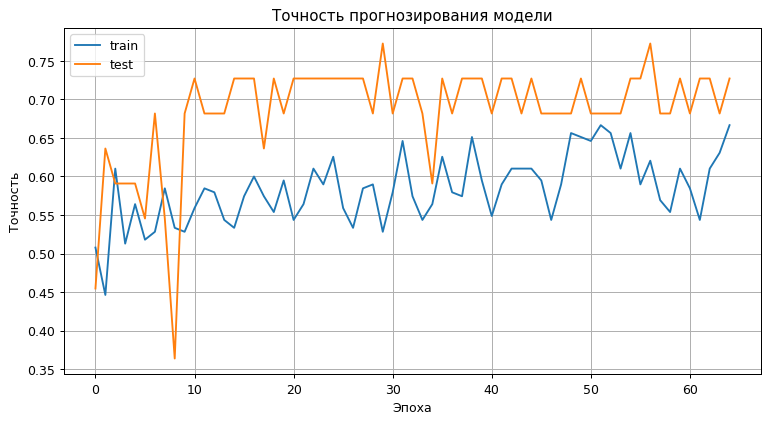

In [ ]:
plt.figure(figsize=(10, 5), dpi=90)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность прогнозирования модели')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')

Потери модели

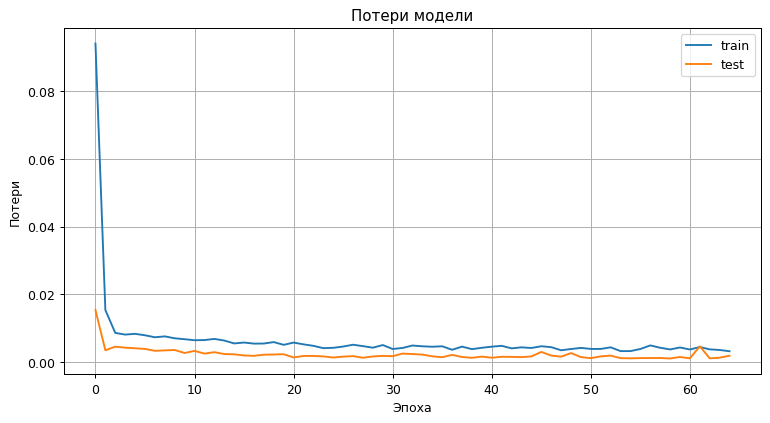

In [ ]:
plt.figure(figsize=(10, 5), dpi=90)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.grid()
plt.xlabel('Эпоха')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Работа с загруженной моделью

In [ ]:
Loading_model = tf.keras.models.load_model(save_path)
Loading_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 10)                0         
                                                                 
 dense_20 (Dense)            (None, 32)                352       
                                                                 
 dense_21 (Dense)            (None, 128)               4224      
                                                                 
 dense_22 (Dense)            (None, 512)               66048     
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_24 (Dense)            (None, 2)                

## Визуализация архитектуры модели

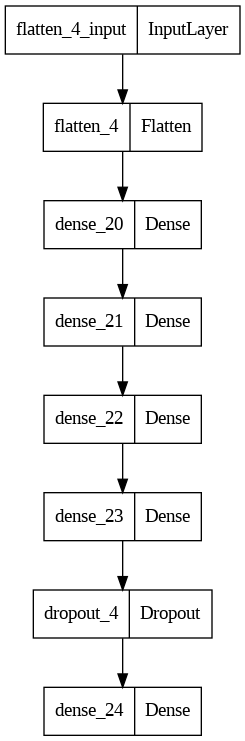

In [ ]:
keras.utils.plot_model(Loading_model, 'Model.png')

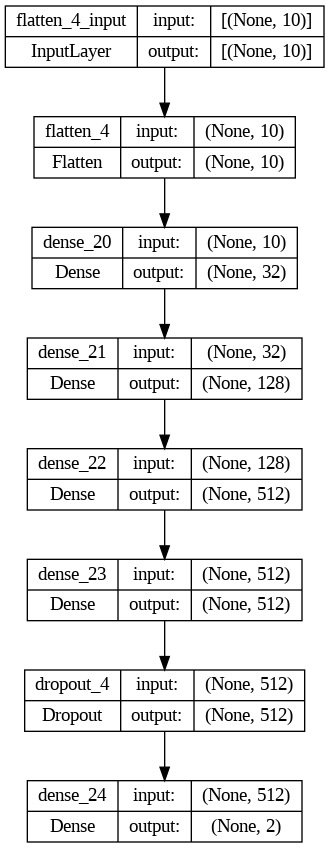

In [ ]:
keras.utils.plot_model(Loading_model, 'model_with_shape_info.png', show_shapes=True)

## Проверка точности предсказания

Пробное предсказание

In [ ]:
data = [[ 1.0000, 0.9529, -0.0297, -0.0028, 0.6945, 0.0000, 0.0000,  0.0000, 0.8227, 0.0000]] # X_valid[0]
print(f"Предсказание = {Loading_model.predict(data)}")
print(f"Реальное значение = 1.000  0.944]")

1/1 [==============================] - 0s 90ms/step
Предсказание = [[0.93352956 0.9107862 ]]
Реальное значение = 1.000  0.944]


Преобразование данных в массив numpy

In [ ]:
test_arr = np.array(y_valid, ndmin=2)
predict_arr = np.array(X_valid, ndmin=2)
test_predict = Loading_model.predict(predict_arr)

1/1 [==============================] - 0s 26ms/step


### График тестовой выборки

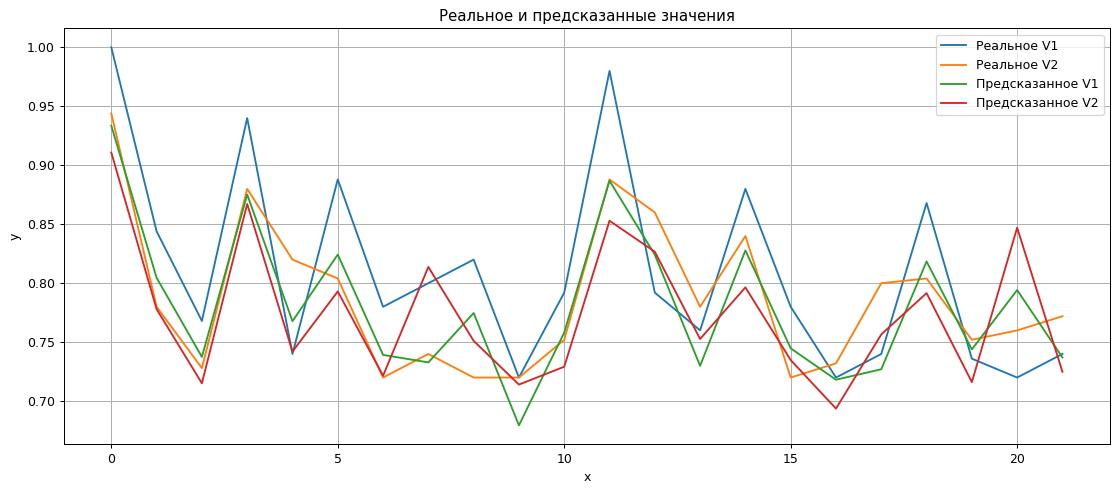

In [ ]:
def plot_result(testY , test_predict):
    plt.figure(figsize=(15, 6), dpi=90)
    plt.plot(testY)
    plt.plot(test_predict)
    plt.legend(['Реальное V1', 'Реальное V2', 'Предсказанное V1', 'Предсказанное V2'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Реальное и предсказанные значения')
    plt.grid()
plot_result(test_arr, test_predict)

Прогон по тестовой выборке

In [ ]:
for i in range(len(X_valid)):
  data = np.array(predict_arr[i], ndmin=2)
  y = Loading_model.predict(data)
  print(f" {i}-е Предсказание при вводных данных {data}  = {y}")
  print(f"{i}-е Реальное значение = {test_arr[i]} ")

1/1 [==============================] - 0s 81ms/step
 0-е Предсказание при вводных данных [[ 1.      0.9529 -0.0297 -0.0028  0.6945  0.      0.      0.      0.8227
   0.    ]]  = [[0.93352956 0.9107862 ]]
0-е Реальное значение = [1.    0.944] 
1/1 [==============================] - 0s 21ms/step
 1-е Предсказание при вводных данных [[ 0.9444  0.7961  0.0378 -0.04    0.6608 -0.0152  0.0148 -0.026   0.8109
   0.    ]]  = [[0.80462354 0.77799886]]
1-е Реальное значение = [0.844 0.78 ] 
1/1 [==============================] - 0s 20ms/step
 2-е Предсказание при вводных данных [[ 0.8148  0.7333  0.0426 -0.0537  0.5074 -0.0079 -0.0079 -0.0079  0.8136
   0.    ]]  = [[0.73746794 0.71515036]]
2-е Реальное значение = [0.768 0.728] 
1/1 [==============================] - 0s 25ms/step
 3-е Предсказание при вводных данных [[ 0.8333  0.8922  0.0776 -0.0009  0.6614 -0.026   0.      0.      0.8077
   0.    ]]  = [[0.8752246  0.86720747]]
3-е Реальное значение = [0.94 0.88] 
1/1 [=========================

### Root Mean Square Error (RMSE) - Среднеквадратичное отклонение

In [ ]:
def print_error(trainY, testY, train_predict, test_predict):
    # Ошибка предсказания
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Печать значений
    print('RMSE для тренировочной выборки: %.3f RMSE' % (train_rmse))
    print('RMSE для тестовой выборки: %.3f RMSE' % (test_rmse))

# Сделаем предсказания
train_predict = Loading_model.predict(X_train)
test_predict = Loading_model.predict(X_valid)
# Среднеквадратичное отклонение
print_error(y_train, y_valid, train_predict, test_predict)

1/1 [==============================] - 0s 23ms/step
RMSE для тренировочной выборки: 0.035 RMSE
RMSE для тестовой выборки: 0.044 RMSE


## Проверка скорости работы

In [ ]:
data = [[1, 0.9529, -0.0297, -0.0028, 0.6945, 0, 0, 0, 0.8227, 0]]
data_2 = [[0.9259, 0.7549, 0.0609, -0.0205, 0.539, 0, 0, 0, 0.7947, 0.3]]
data_3 = [[0.9259, 0.7353, 0.1244, -0.04, 0.4651, -0.0628, -0.0628, -0.0628,  0.944, 0.075]]
start_time = time.time()
Loading_model.predict(data)
Loading_model.predict(data_2)
Loading_model.predict(data_3)
time_for_operation = (time.time() - start_time)
print(f"Среднее время на расчёт = {round(time_for_operation / 3, 5)} секунд")

1/1 [==============================] - 0s 39ms/step
Среднее время на расчёт = 0.10513 секунд


Скорость расчёта при анализе пакета в 22 значения тестовой выборки

In [ ]:
start_time = time.time()
predict_arr = np.array(X_valid, ndmin=2)
test_predict = Loading_model.predict(predict_arr)
time_for_operation = (time.time() - start_time)
print(f"Время на расчёт = {round(time_for_operation / 3, 5)} секунд")

1/1 [==============================] - 0s 22ms/step
Время на расчёт = 0.02776 секунд
